# Code to analyze the progressive blackjack side bet. 
## Premise of game: 
### 1. Costs $5 to play. 
### 2. Pays out if the player's hand and dealer's hand combines for a royal flush AND the dealer has blackjack. 
### 3. Royal flush of diamonds pays out the entire meter and other suits pay out 10% of it. 
Author: Evan Tsiklidis

In [1]:
import pandas as pd
import numpy as np
from random import shuffle
from blackjack_sidebet_sim import Blackjack_shoe
import os

In [2]:
cards = ['ace','king','queen','jack','ten','nine','eight','seven','six','five','four','three','two']
suits = ['spades','hearts','clubs','diamonds']

In [3]:
counting_df = pd.read_csv(os.getcwd()+'/counting_systems/high_low_blackjack.csv').drop(['Unnamed: 0'],axis=1)
counting_df.head()

,Card,Value
0,ace_of_spades,-1
1,ace_of_hearts,-1
2,ace_of_clubs,-1
3,ace_of_diamonds,-1
4,king_of_spades,-1


In [4]:
counting_rules = dict(zip(counting_df.Card, counting_df.Value))
small_cards = counting_df[counting_df['Value']>0].Card.tolist()

In [32]:
run_sims_flag = False
num_sims = 1000000
jackpot = 500000
cost_to_play = 5
win_counter = 0
avg_rt = num_sims*60/3600 #assume 60 seconds/hand in real life. 
lower_rt = num_sims*30/3600 #assume 30 seconds/hand in real life.
upper_rt = num_sims*90/3600 #assume 90 seconds/hand in real life.

In [6]:
if run_sims_flag == True: 
    num_decks_list = [8,7,6,5,4,3,2,1]
    matrix = []
    for num_decks in num_decks_list: 
        data = []
        expectation = -1*num_sims*5
        for running_count in range(4*5*num_decks):  
            shoe = Blackjack_shoe(num_decks_remaining=num_decks,running_count=running_count,\
                            counting_rules=counting_rules,small_cards=small_cards,win_counter=0)        
            for j in range(num_sims): 
                shoe.create_shoe()
                shoe.establish_count()
                shoe.evaluate_jackpot()
            shoe.summarize_results()
            num_wins = shoe.get_expectation_ranges()
            data = [num_decks,running_count,num_wins]
            matrix.append(data)
    df = pd.DataFrame(matrix,columns = ['num_decks','running_count','num_wins'])
    df.to_csv(os.getcwd()+'/counting_systems/simulated_results1.csv')
    df.head()

In [27]:
df = pd.read_csv(os.getcwd()+'/counting_systems/simulated_results1.csv').drop(['Unnamed: 0'],axis=1)
df.head()

,num_decks,running_count,num_wins
0,8,0,9
1,8,1,6
2,8,2,4
3,8,3,4
4,8,4,9


In [28]:
df['Expected_Cash_Return']=(df['num_wins']*jackpot*(0.25+0.025+0.025+0.025)) - num_sims*cost_to_play
df['avg'] =  df['Expected_Cash_Return']/avg_rt
df['upper'] =  df['Expected_Cash_Return']/upper_rt
df['lower'] = df['Expected_Cash_Return']/lower_rt
df.head()

,num_decks,running_count,num_wins,Expected_Cash_Return,avg,upper,lower
0,8,0,9,9625000.0,577.5,385.0,1155.0
1,8,1,6,4750000.0,285.0,190.0,570.0
2,8,2,4,1500000.0,90.0,60.0,180.0
3,8,3,4,1500000.0,90.0,60.0,180.0
4,8,4,9,9625000.0,577.5,385.0,1155.0


In [29]:
df['True_Count'] = df['running_count']/df['num_decks']
df.head()

,num_decks,running_count,num_wins,Expected_Cash_Return,avg,upper,lower,True_Count
0,8,0,9,9625000.0,577.5,385.0,1155.0,0.000
1,8,1,6,4750000.0,285.0,190.0,570.0,0.125
2,8,2,4,1500000.0,90.0,60.0,180.0,0.250
3,8,3,4,1500000.0,90.0,60.0,180.0,0.375
4,8,4,9,9625000.0,577.5,385.0,1155.0,0.500


<AxesSubplot:xlabel='True_Count'>

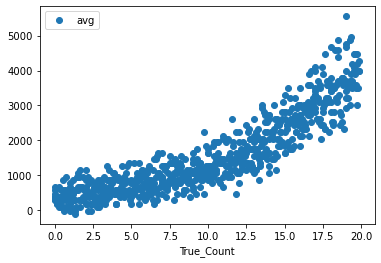

In [33]:
df.plot(x='True_Count', y='avg', style='o')